In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno


In [108]:
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
%matplotlib inline


In [109]:
df = pd.read_csv('heart_disease dataset.csv')


In [110]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [111]:
df.describe().style.background_gradient(cmap = "summer")

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


Hypothesis: There are outliers in the data for both maximum and minimum values.

In [112]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


EXPLORATORY DATA ANALYSIS

Check the dataset for gaps in the data

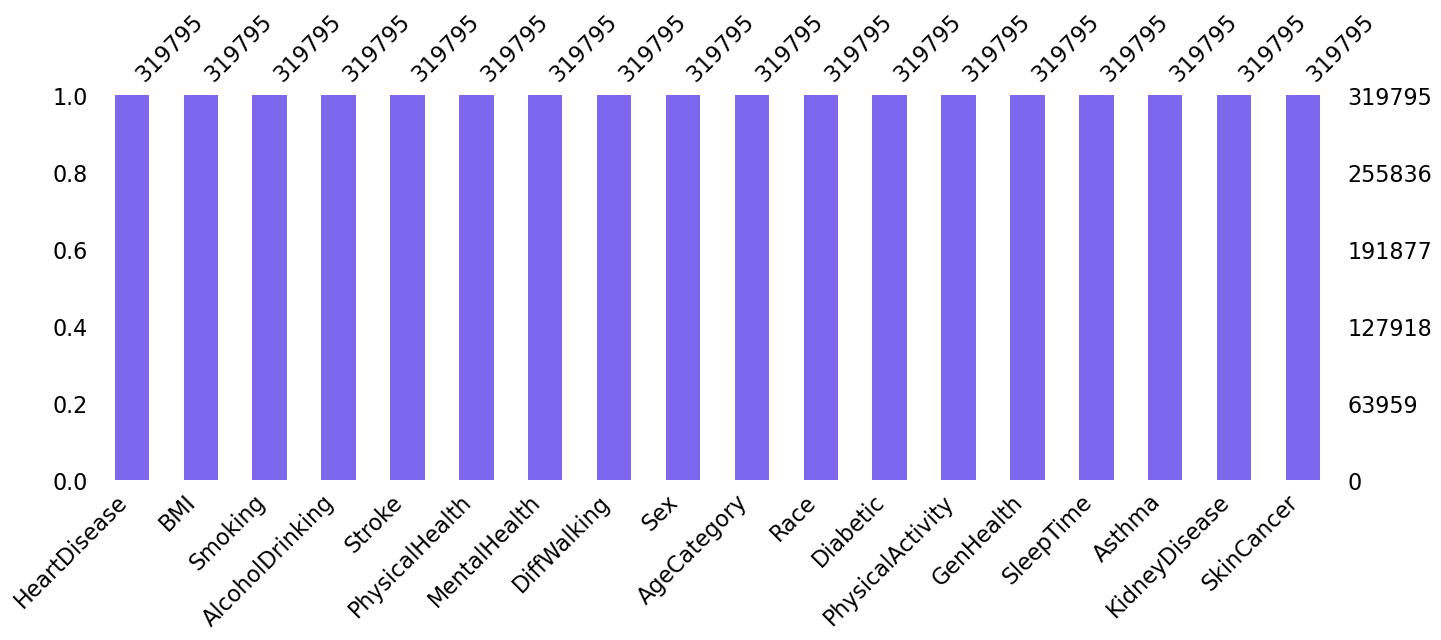

In [113]:
msno.bar(df, figsize = (16,5),color = "#7B68EE")
plt.show()

In [114]:
#To check the rows and column of the dataset
print(df.shape)
df.head()
#to check null values
print(df.isnull().sum())

(319795, 18)
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


No missing values found

Let's look at the distribution of the target variable

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

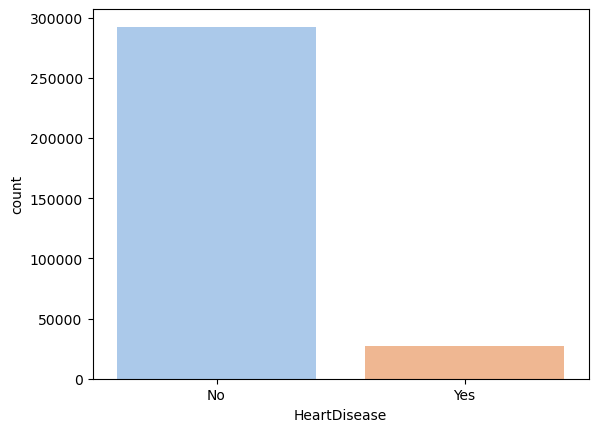

In [115]:
sns.countplot(x='HeartDisease',data=df,palette='pastel')

<AxesSubplot:ylabel='HeartDisease'>

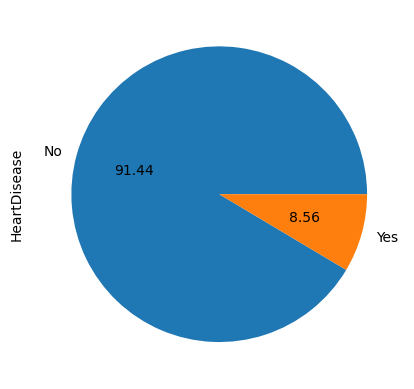

In [116]:
df['HeartDisease'].value_counts().plot.pie(autopct='%.2f')

We are dealing with an unbalanced sample, where the majority of people are healthy.

Let's look at unique values in categorical objects

In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [118]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


Numeric variables are BMI, PhysicalHealth, MentalHealth, SleepTime. The rest are categorical.

In [119]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [120]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

Let's analyze numerical variables.

Text(0.5, 0.98, 'Visualizing continuous columns (dataset)')

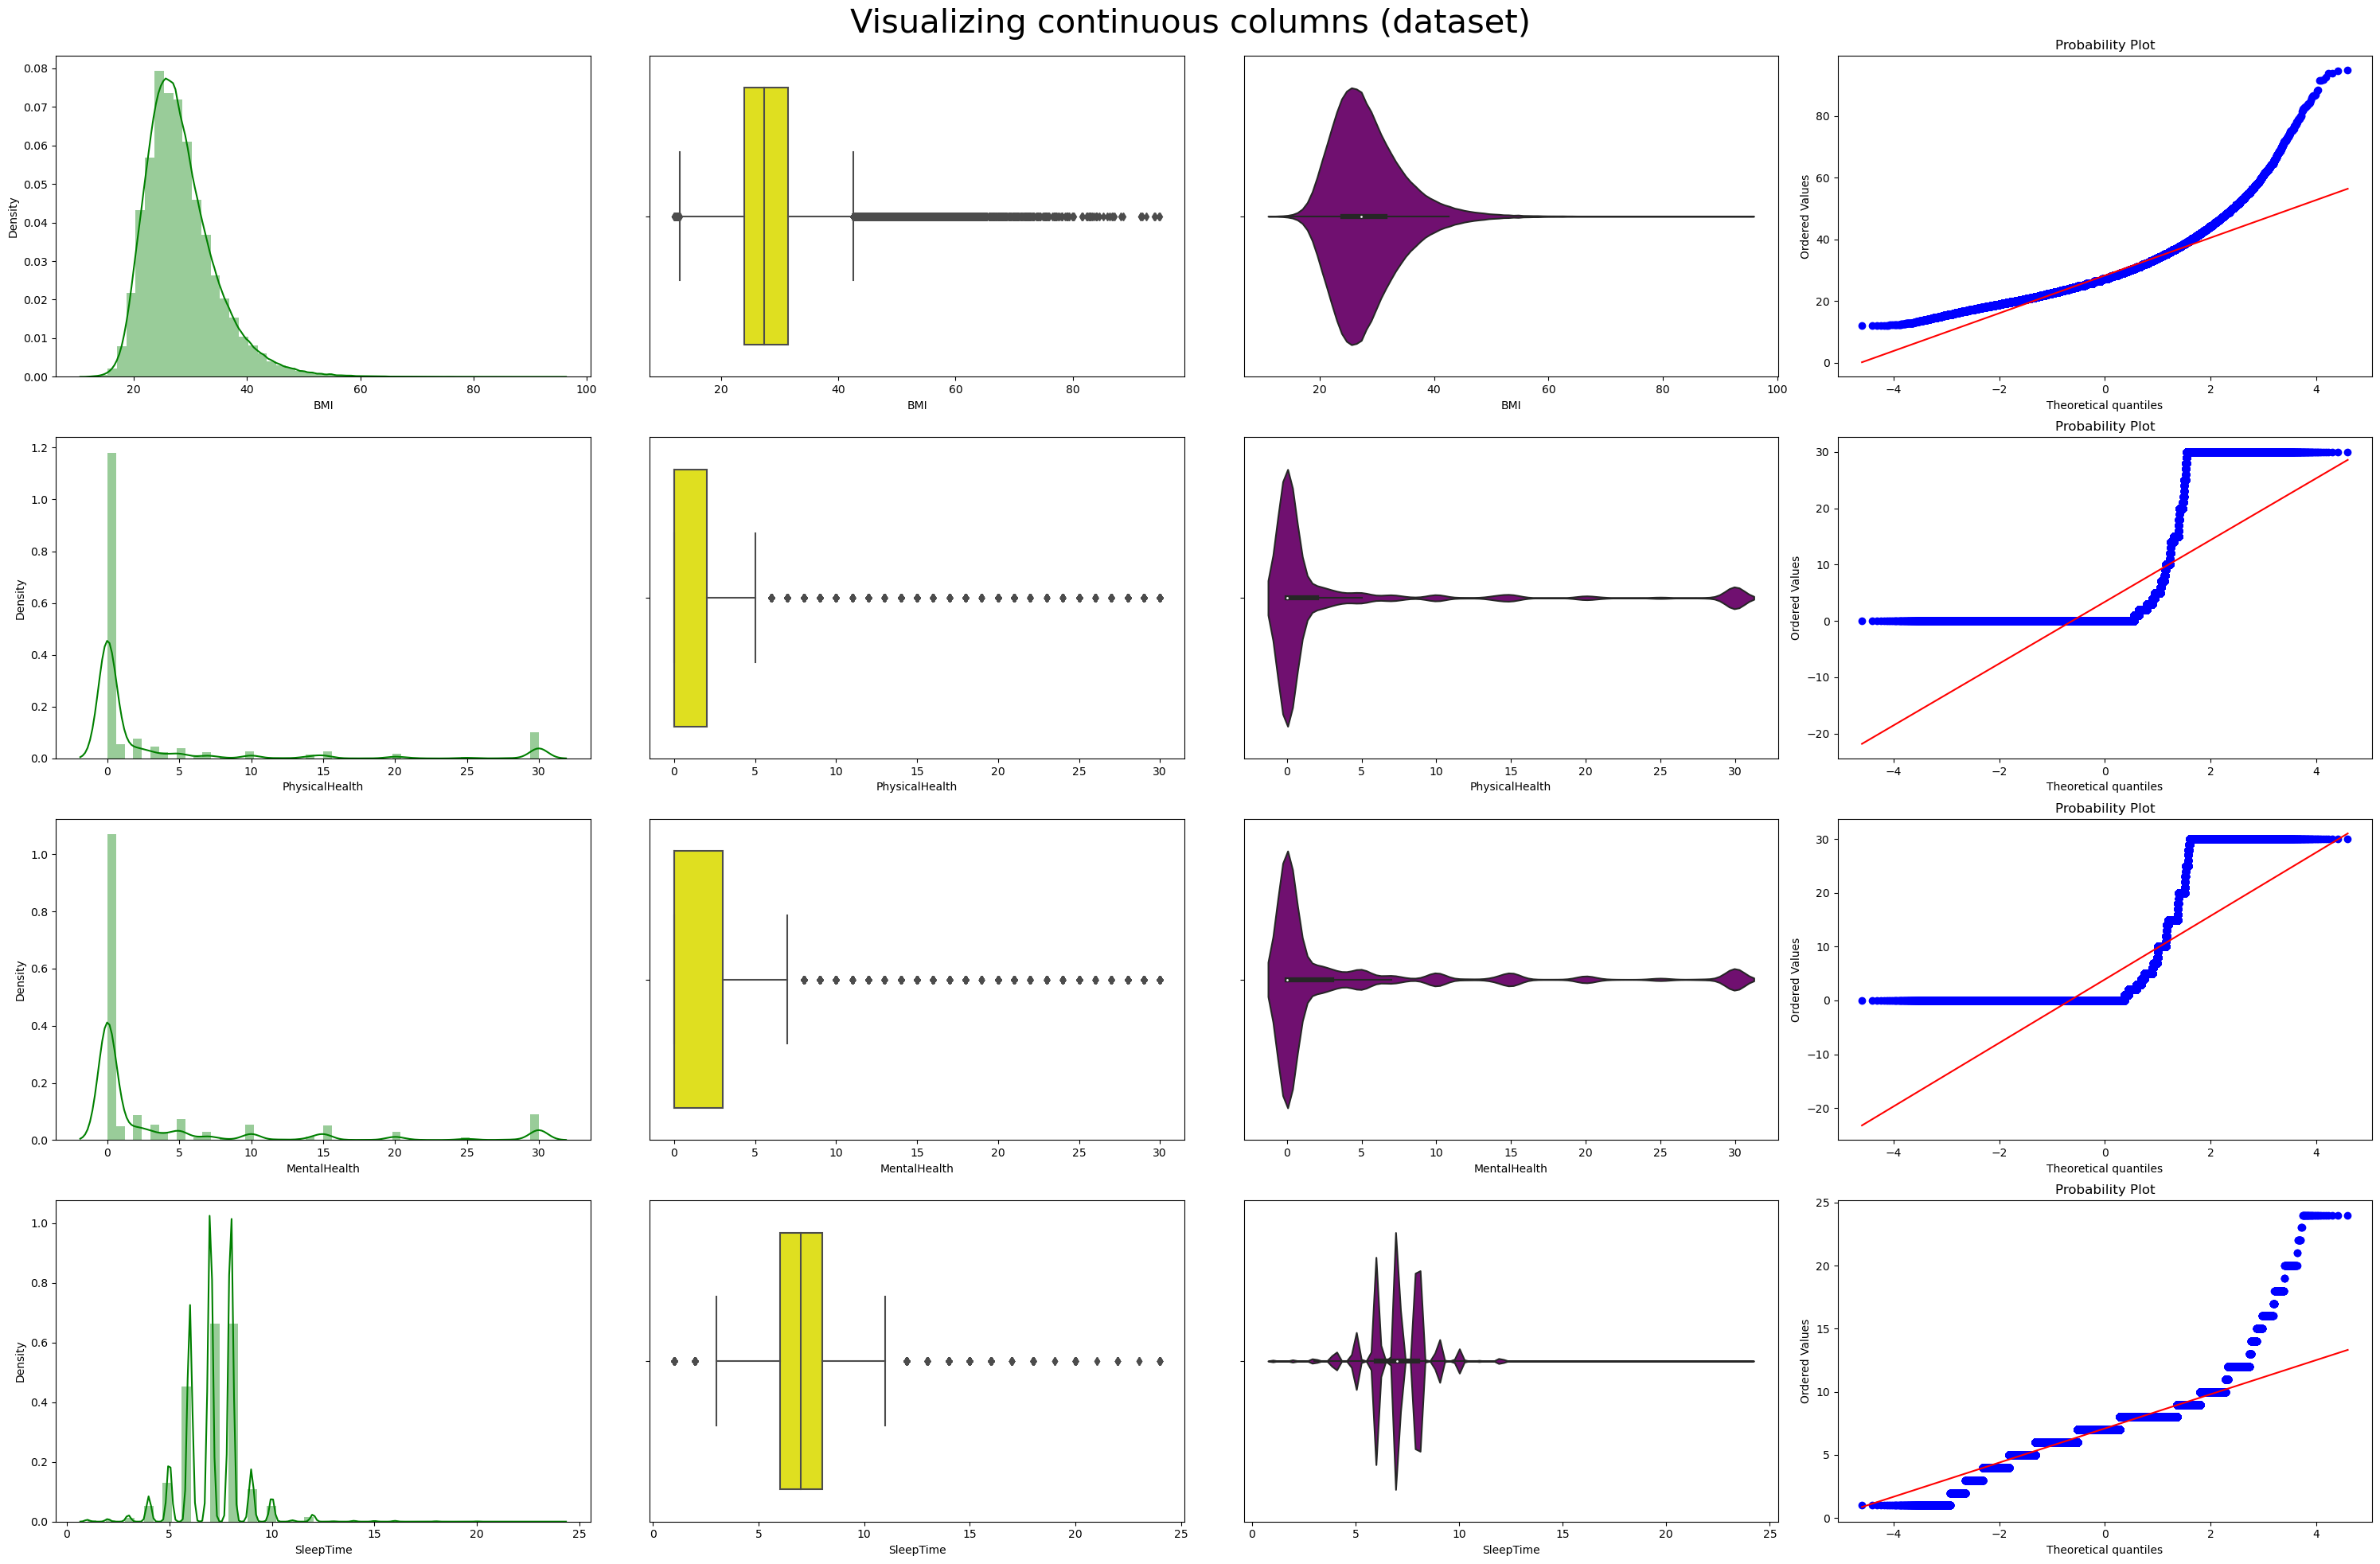

In [121]:
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    sns.violinplot(df[i],ax=ax[index,2],color='purple')
    stats.probplot(df[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (dataset)",fontsize=30)

The analysis showed that only the BMI variable is close to the normal distribution, the rest are close to bimodal.

Let's look at the distribution of the number of people with heart disease from various factors

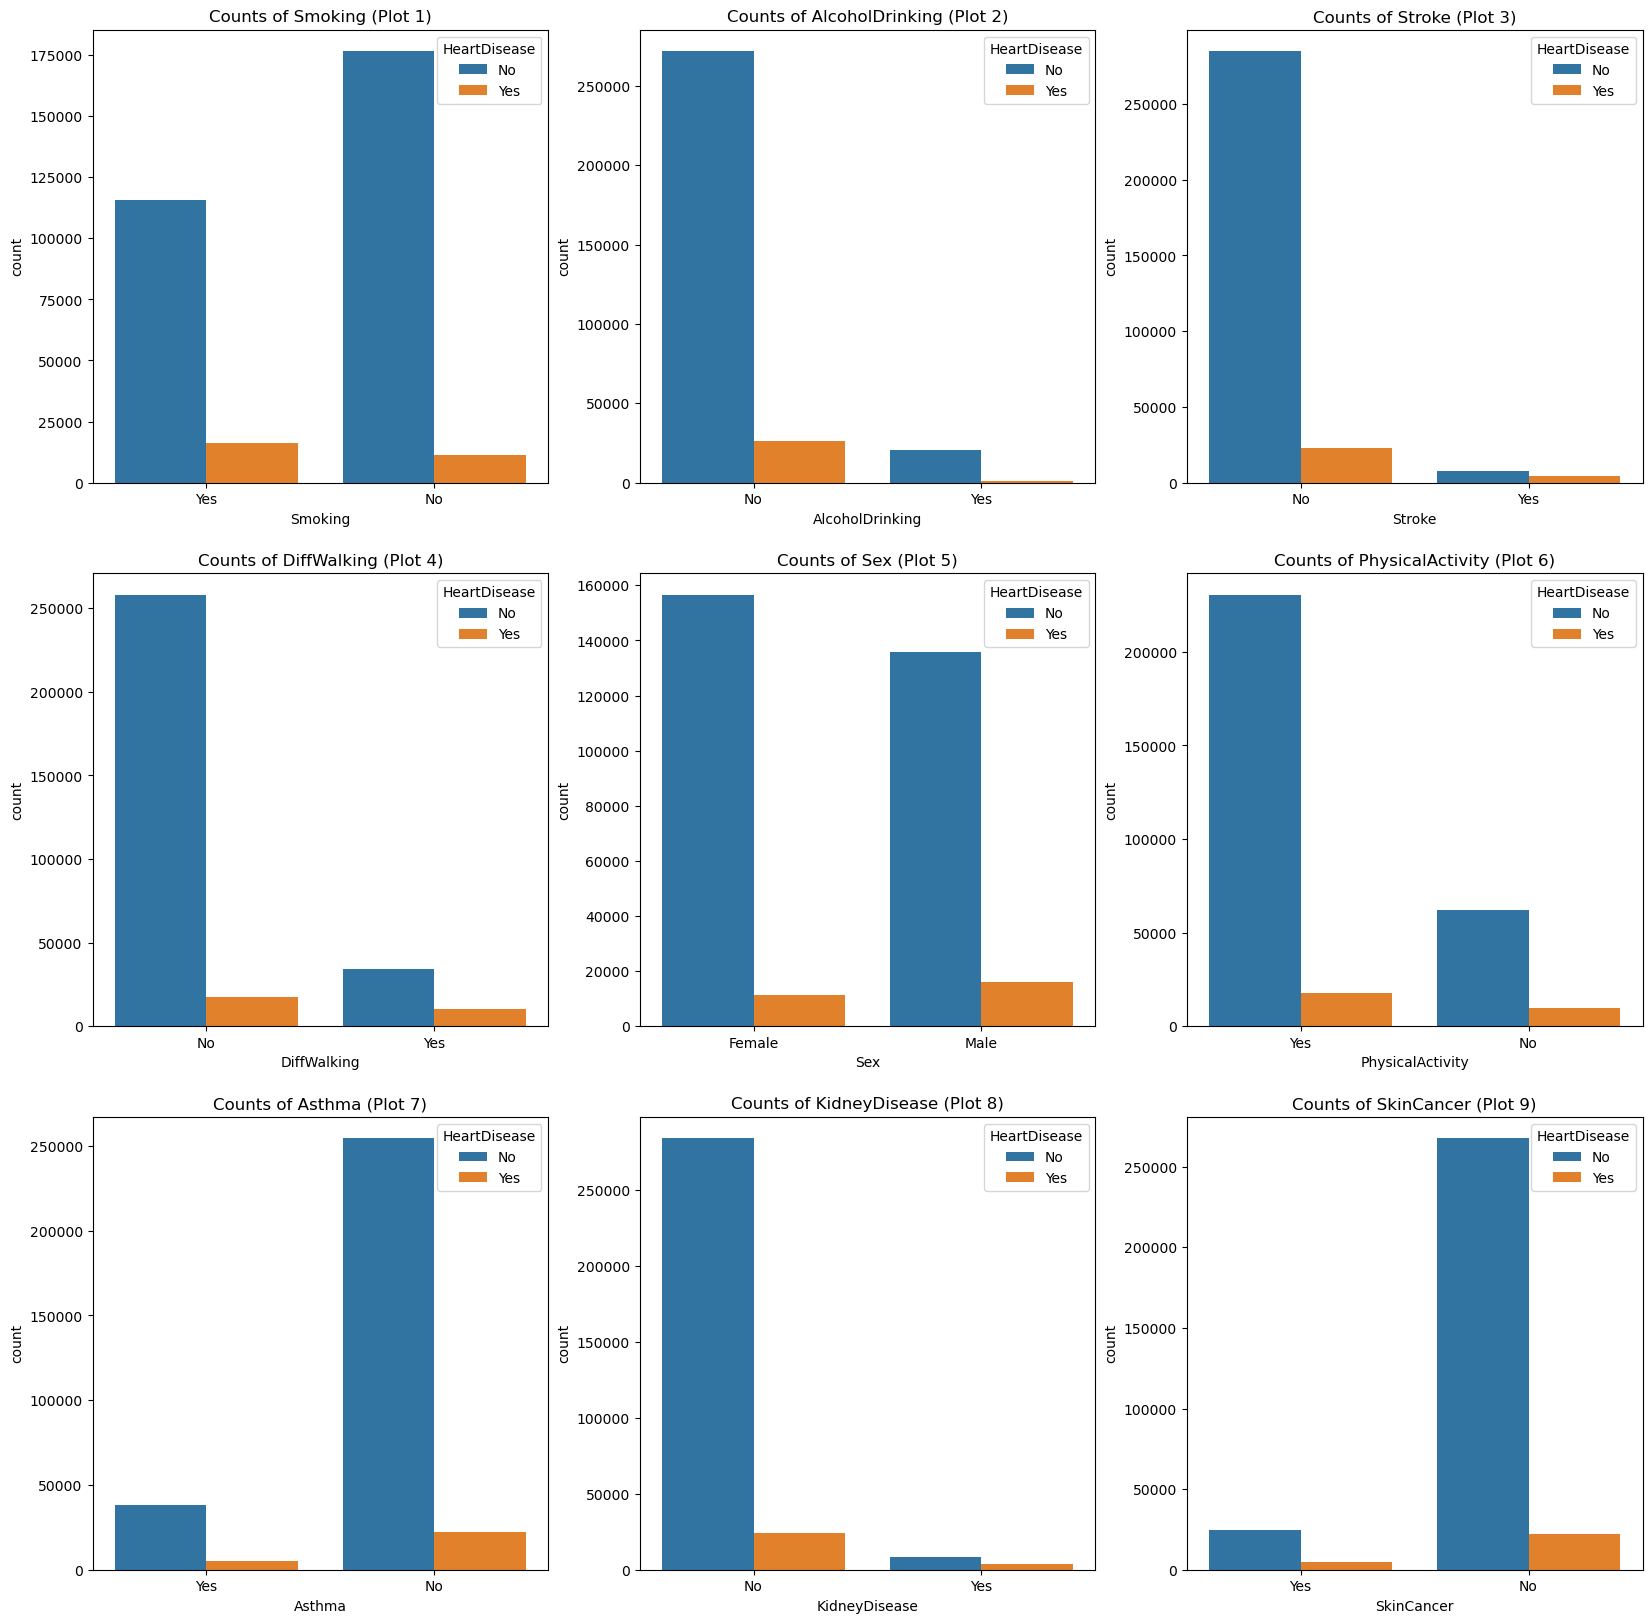

In [122]:
# This list of lists contains all the columns which have binary categorical values
colRange = [['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity'],['Asthma','KidneyDisease','SkinCancer']]
# This function prints the countplots counting the number of people in each category
def printCount(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    row=0
    col=0
    p_count=1
    for row in range(3):
        for col in range(3):
            # reads column name from the list
            column = colRange[row][col]
            # plots the counts of the particular column
            sns.countplot(ax=axes[row,col],x=df[column],hue=df['HeartDisease'])
            # sets the title of the corresponding plot along with plot number
            axes[row,col].set_title("Counts of {} (Plot {})".format(column,p_count))
            p_count += 1
# Calling the function
printCount(colRange)
  

Observation
Smoking: Those who smoke have a high chance of Heart Diseases than people who don't
Drinking: people who do not drink alcohol have a lower of Heart Disease
Stroke:   people who have Heart Disease have a lower chance of having a Stroke
Diffwalking: people who do not have any difficulty walking may have a lower chance of having Heart Disease
Sex:       Males have a higher chance of Heart Disease than Females
Physical Activity: From the plot Physical Activity could be a cause of Heart Diseases
Asthma:    From the plot People who have asthma have a lower chance of Heart Disease

Check for outliers in the dataset in the numerical variables

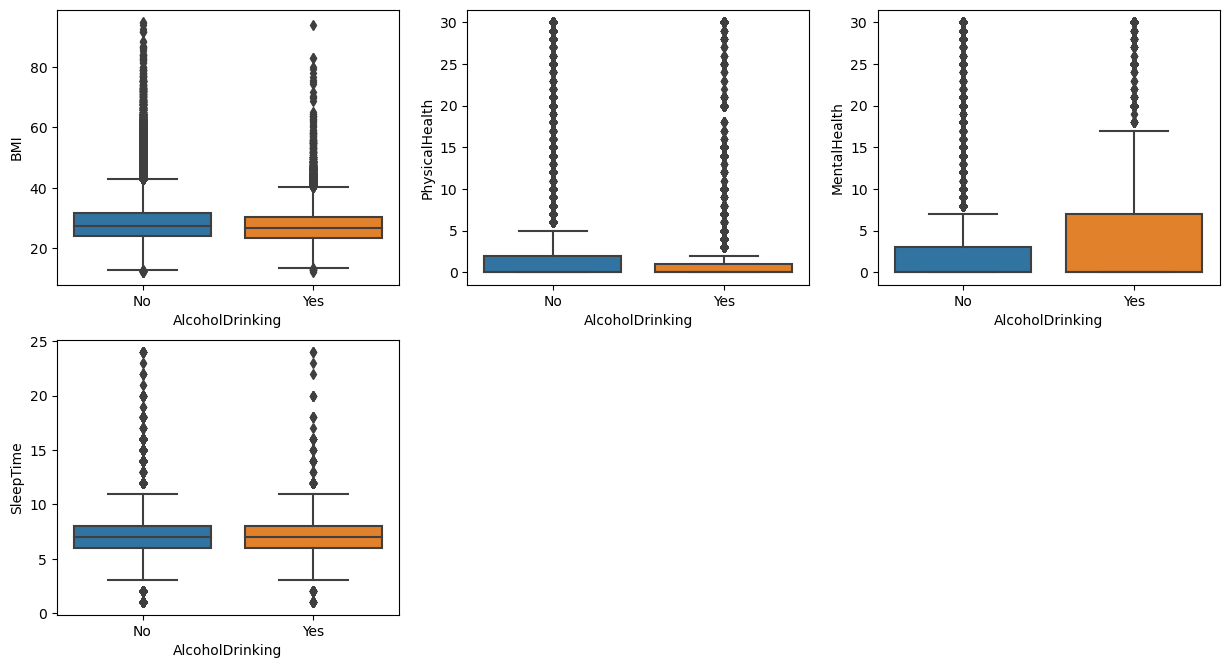

In [123]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature], x = df['AlcoholDrinking'])
    i+=1
    

From all the graphs presented, it can be concluded that alcohol consumption and smoking are not the main factors in heart disease.

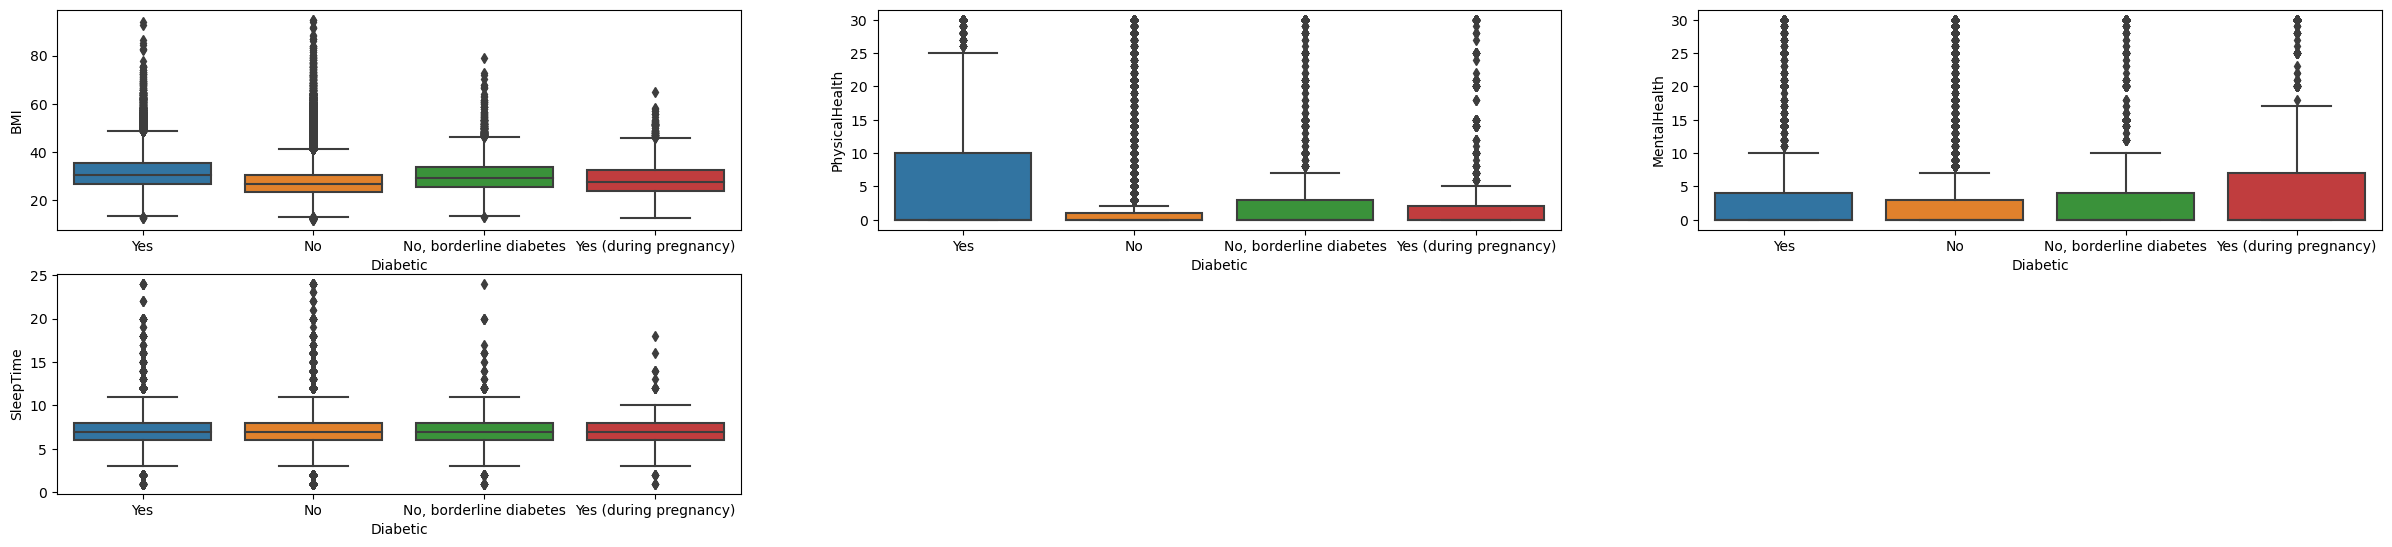

In [124]:
i=1
plt.figure(figsize=(30,20))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature], x = df['Diabetic'])
    i+=1

Let's transform our dataset using the OrdinalEncoder method.

Text(0.5, 1.0, 'Variation of Heart Disease amoung Races')

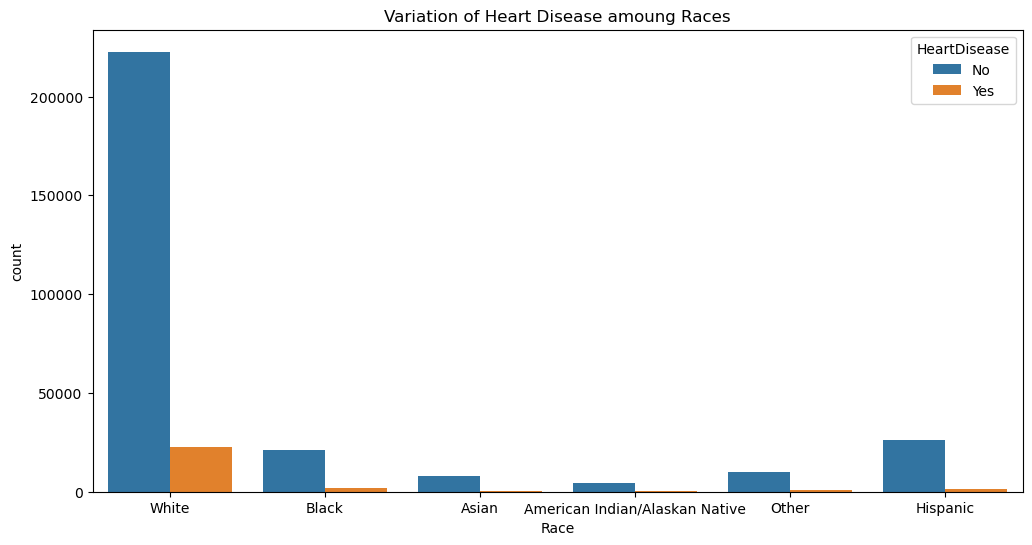

In [125]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# countplot plots the counts of each type of value in a particular column
# hue property is used to color code the counts according to a second categorical variable.
# plotting the graph
sns.countplot(x= df['Race'],hue=df['HeartDisease'])
plt.title('Variation of Heart Disease amoung Races')

Text(0.5, 1.0, 'Distribution of BMI Among People')

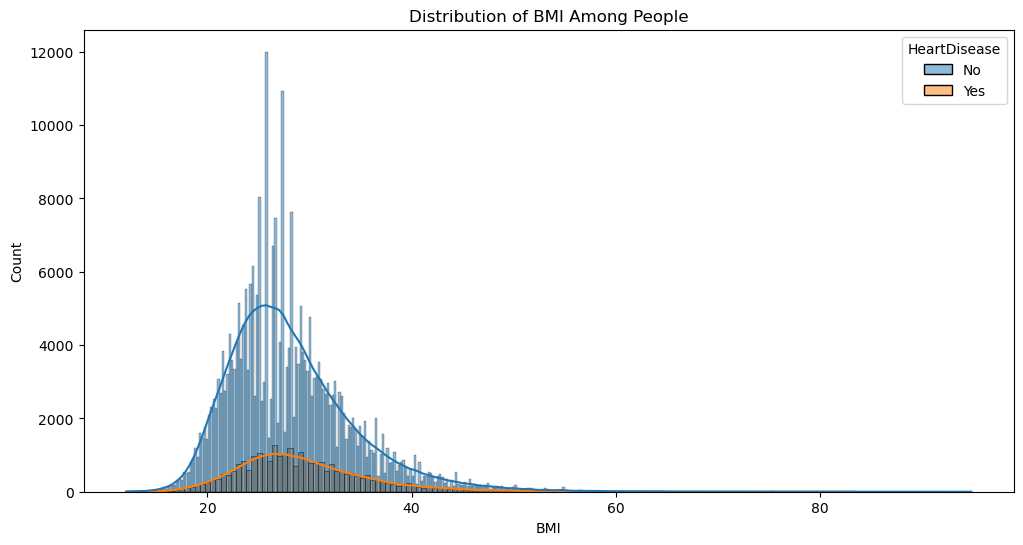

In [126]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# countplot plots the counts of each type of value in a particular column
# hue property is used to color code the counts according to a second categorical variable.
# plotting the graph
sns.histplot(data=df[df['HeartDisease']=='Yes'],x='BMI',kde=True,color='red', hue= df['HeartDisease'])
sns.histplot(data=df[df['HeartDisease']=='No'],x='BMI',kde=True,color='blue' , hue= df['HeartDisease'])
plt.title('Distribution of BMI Among People')


A high BMI is associated with heart disease

Text(0.5, 1.0, 'Physical Health Pattern')

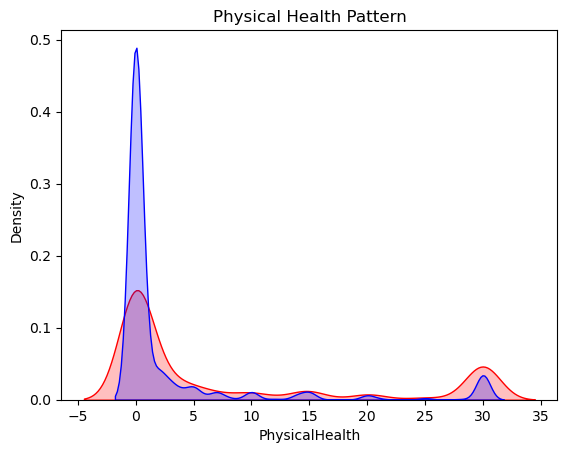

In [127]:
sns.kdeplot(df[df['HeartDisease']=='Yes']['PhysicalHealth'],shade=True,color='red')
sns.kdeplot(df[df['HeartDisease']=='No']['PhysicalHealth'],shade=True,color='blue')
plt.title('Physical Health Pattern')


Text(0.5, 1.0, 'Variation of Heart Disease amoung Agegroups')

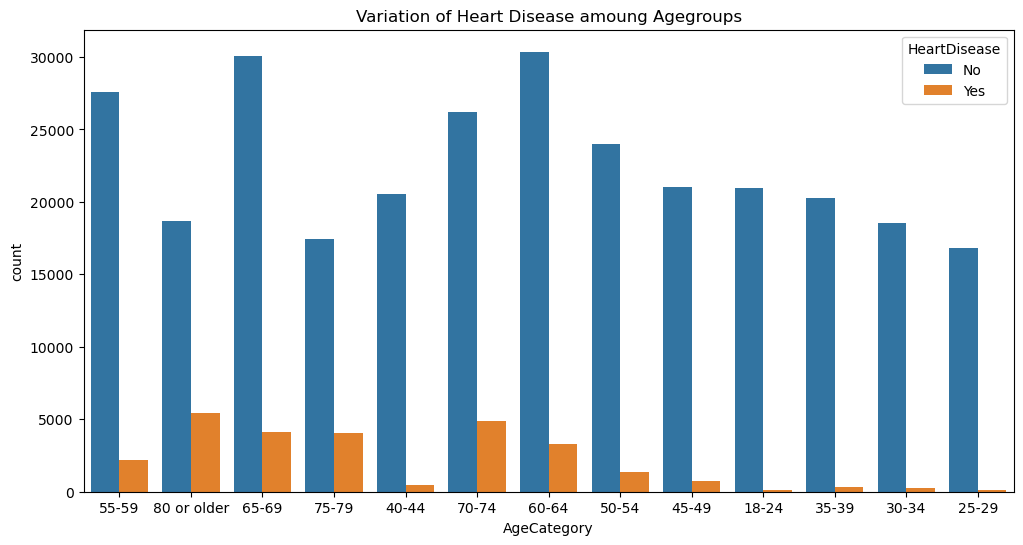

In [128]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# countplot plots the counts of each type of value in a particular column
# hue property is used to color code the counts according to a second categorical variable.
# plotting the graph
sns.countplot(x= df['AgeCategory'],hue=df['HeartDisease'])
plt.title('Variation of Heart Disease amoung Agegroups')

People from 80 years and older are more likely to have heart disease

In [129]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[categorical_features])
df[categorical_features] = enc.transform(df[categorical_features])

In [130]:
df.head

<bound method NDFrame.head of         HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                0.0  16.60      1.0              0.0     0.0               3   
1                0.0  20.34      0.0              0.0     1.0               0   
2                0.0  26.58      1.0              0.0     0.0              20   
3                0.0  24.21      0.0              0.0     0.0               0   
4                0.0  23.71      0.0              0.0     0.0              28   
...              ...    ...      ...              ...     ...             ...   
319790           1.0  27.41      1.0              0.0     0.0               7   
319791           0.0  29.84      1.0              0.0     0.0               0   
319792           0.0  24.24      0.0              0.0     0.0               0   
319793           0.0  32.81      0.0              0.0     0.0               0   
319794           0.0  46.56      0.0              0.0     0.0               0  

In [131]:
correlation = df.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



<AxesSubplot:>

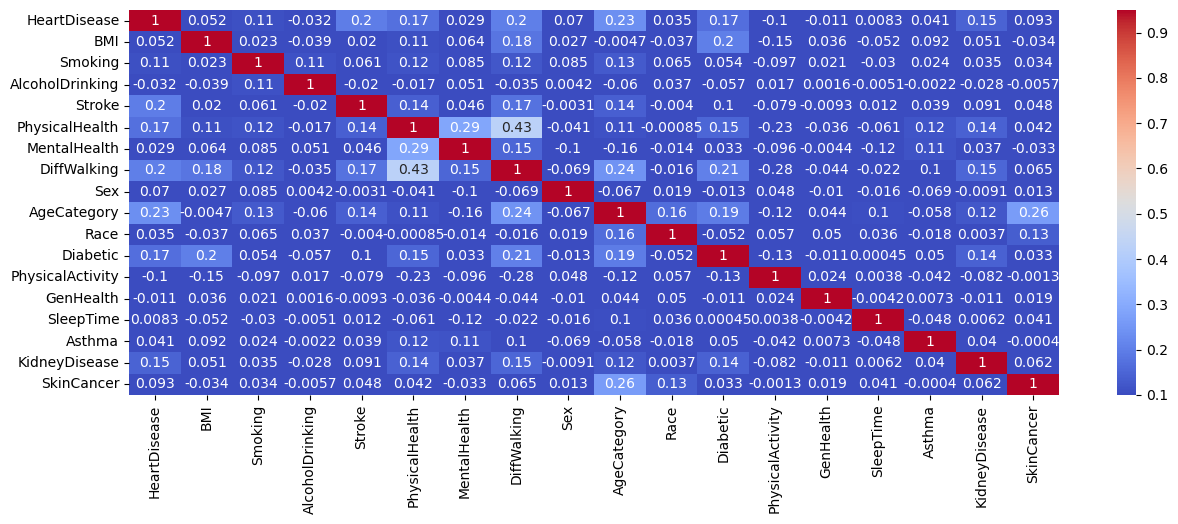

In [132]:
#Heatmap to understand the correlation coefficient
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.corr() , annot =True , cmap = 'coolwarm',vmin=0.1, vmax= 0.95 )

In [133]:
# iloc[] function is used to select values from the dataset

X = df.iloc[:,1:].values
# dependent variable
y = df.iloc[:,0].values

SPLITTING THE DATASET

In [101]:
# train_test_split() is used to divide dataset into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [134]:
y=df['HeartDisease']
df.drop('HeartDisease',axis=1,inplace=True)

In [135]:
X_df, X_test, y_df, y_test=train_test_split(df,y,test_size=0.1,random_state=42)

Let's build simple models and evaluate the quality of their training

KNN CLASSIFIER

In [137]:
model1 = KNeighborsClassifier()
scores = dict()

#for m in models:
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred1)
    
print(cm1)
print(f'model1: {str(model1)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred1)}')
print(f'Precission_score: {precision_score(y_test,y_pred1)}')
print(f'Recall_score: {recall_score(y_test,y_pred1)}')
print(f'F1-score: {f1_score(y_test,y_pred1)}')
print('-'*30, '\n')

[[28824   288]
 [ 2393   475]]
model1: KNeighborsClassifier()
Accuracy_score: 0.916166353971232
Precission_score: 0.6225425950196593
Recall_score: 0.16562064156206416
F1-score: 0.2616359129716332
------------------------------ 



In [136]:
model2 = LogisticRegression()
scores = dict()

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
    
print(cm2)
print(f'model2: {str(model2)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred2)}')
print(f'Precission_score: {precision_score(y_test,y_pred2)}')
print(f'Recall_score: {recall_score(y_test,y_pred2)}')
print(f'F1-score: {f1_score(y_test,y_pred2)}')
print('-'*30, '\n')

[[28874   238]
 [ 2593   275]]
model2: LogisticRegression()
Accuracy_score: 0.9114759224515322
Precission_score: 0.5360623781676414
Recall_score: 0.09588563458856346
F1-score: 0.1626737651582372
------------------------------ 



In [138]:
model3 = XGBClassifier()
scores = dict()

model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred3)
    
print(cm3)
print(f'model3: {str(model3)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred3)}')
print(f'Precission_score: {precision_score(y_test,y_pred3)}')
print(f'Recall_score: {recall_score(y_test,y_pred3)}')
print(f'F1-score: {f1_score(y_test,y_pred3)}')
print('-'*30, '\n')

[[28940   172]
 [ 2508   360]]
model3: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy_score: 0.9161976235146967
Precission_score: 0.6766917293233082
Recall_score: 0.12552301255230125
F1-score: 0.21176470588235294
------------------------------ 



In [139]:
model4 = ExtraTreesClassifier()
scores = dict()

model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
cm4 = confusion_matrix(y_test,y_pred4)
    
print(cm4)
print(f'model4: {str(model4)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred4)}')
print(f'Precission_score: {precision_score(y_test,y_pred4)}')
print(f'Recall_score: {recall_score(y_test,y_pred4)}')
print(f'F1-score: {f1_score(y_test,y_pred4)}')
print('-'*30, '\n')

[[28909   203]
 [  582  2286]]
model4: ExtraTreesClassifier()
Accuracy_score: 0.9754534083802376
Precission_score: 0.9184411410204901
Recall_score: 0.797071129707113
F1-score: 0.8534627590069068
------------------------------ 



In [140]:
model5 = RandomForestClassifier(criterion='entropy',n_estimators=50)
scores = dict()

model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
cm5 = confusion_matrix(y_test,y_pred5)
    
print(cm5)
print(f'model5: {str(model5)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred5)}')
print(f'Precission_score: {precision_score(y_test,y_pred5)}')
print(f'Recall_score: {recall_score(y_test,y_pred5)}')
print(f'F1-score: {f1_score(y_test,y_pred5)}')
print('-'*30, '\n')

[[28988   124]
 [  627  2241]]
model5: RandomForestClassifier(criterion='entropy', n_estimators=50)
Accuracy_score: 0.9765165728580363
Precission_score: 0.947568710359408
Recall_score: 0.7813807531380753
F1-score: 0.856487674374164
------------------------------ 



Applying Hyperparameter Tuning on Random Forest

RandomizedSearchCV

In [28]:
# making the set of parameters to test the RandomizedSearchCV 
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini']
}
print(param_grid)

{'n_estimators': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [32]:
rcv = RandomizedSearchCV(estimator=model5,param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)
# training the RandomizedSearchCV to find the best parameters
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=50),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 7, 10, 12,
                                                              14],
                                        'n_estimators': [2, 12, 23, 34, 45, 56,
                                                         67, 

CHECKING BEST PARAMENTERS

In [33]:
rcv.best_params_

{'n_estimators': 56,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 670,
 'criterion': 'gini'}

CHECKING BEST ESTIMATORS

In [34]:
rcv.best_estimator_

RandomForestClassifier(max_depth=670, min_samples_leaf=8, n_estimators=56)

Training Random Forest with Best Parameters Found

In [37]:
model6 = RandomForestClassifier(criterion='gini',n_estimators=56,max_depth=670,max_features='auto',min_samples_split=2,min_samples_leaf=8)
scores = dict()

model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
cm6 = confusion_matrix(y_test,y_pred6)
    
print(cm6)
print(f'model6: {str(model6)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred6)}')
print(f'Precission_score: {precision_score(y_test,y_pred6)}')
print(f'Recall_score: {recall_score(y_test,y_pred6)}')
print(f'F1-score: {f1_score(y_test,y_pred6)}')

[[29053    59]
 [ 2574   294]]
model6: RandomForestClassifier(max_depth=670, min_samples_leaf=8, n_estimators=56)
Accuracy_score: 0.9176672920575359
Precission_score: 0.8328611898016998
Recall_score: 0.10251046025104603
F1-score: 0.18255200248370074


In [45]:
model6 = RandomForestClassifier(criterion='entropy',n_estimators=50,max_depth=10,max_features='auto',min_samples_split=2,min_samples_leaf=8)
scores = dict()

model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
cm6 = confusion_matrix(y_test,y_pred6)
    
print(cm6)
print(f'model6: {str(model6)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred6)}')
print(f'Precission_score: {precision_score(y_test,y_pred6)}')
print(f'Recall_score: {recall_score(y_test,y_pred6)}')
print(f'F1-score: {f1_score(y_test,y_pred6)}')

[[29064    48]
 [ 2732   136]]
model6: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       n_estimators=50)
Accuracy_score: 0.9130706691682301
Precission_score: 0.7391304347826086
Recall_score: 0.04741980474198047
F1-score: 0.0891218872870249


In [41]:
model7 = XGBClassifier(learning_rate =0.1, n_estimators= 1000, max_depth = 5, min_child_weight=1, gamma = 0)
scores = dict()
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
cm7 = confusion_matrix(y_test,y_pred7)


print(f'model7: {str(model7)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred7)}')
print(f'Precission_score: {precision_score(y_test,y_pred7)}')
print(f'Recall_score: {recall_score(y_test,y_pred7)}')
print(f'F1-score: {f1_score(y_test,y_pred7)}')

model7: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy_score: 0.9184490306441526
Precission_score: 0.7372262773722628
Recall_score: 0.14086471408647142
F1-score: 0.23653395784543327


In [46]:

model8 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, 
                       random_state=0, splitter='best')
scores = dict()
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
cm8 = confusion_matrix(y_test,y_pred8)

print(cm8)
print(f'model8: {str(model8)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred8)}')
print(f'Precission_score: {precision_score(y_test,y_pred8)}')
print(f'Recall_score: {recall_score(y_test,y_pred8)}')
print(f'F1-score: {f1_score(y_test,y_pred8)}')


[[28672   440]
 [  504  2364]]
model8: DecisionTreeClassifier(criterion='entropy', random_state=0)
Accuracy_score: 0.9704815509693558
Precission_score: 0.8430813124108416
Recall_score: 0.8242677824267782
F1-score: 0.8335684062059239


In [ ]:
After hyperparameter tuning the random forest still has the highest F1 score